# NBA Game Predictor

We will be using a Logistic Regression model to predict the outcome of NBA games

Note: The model I made just predicts the outcome of the game, before I tried to make a model predicting the score but it gave very poor results. You can maybe play around with my model or try a different one to get it to work for predicting total points

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as sm
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3
from google.colab import files
import tensorflow as tf

In [45]:
# upload dataset csv
files.upload()



{}

In [76]:
# open the dataset
df = pd.read_csv('PLS_WORK.csv')
same_game_data = pd.read_csv('exported_csv.csv')

# Replace Ws with 1s and Ls with 0s
df['WL_HOME'] = df['WL_HOME'].replace(['W'],np.int64(1))
df['WL_HOME'] = df['WL_HOME'].replace(['L'],np.int64(0))

# Replace Ws with 1s and Ls with 0s
same_game_data['WL_HOME'] = same_game_data['WL_HOME'].replace(['W'],np.int64(1))
same_game_data['WL_HOME'] = same_game_data['WL_HOME'].replace(['L'],np.int64(0))

# Convert string values to ints
for i in range(len(df)):
  for j in range(20):
    df.iat[i,j] = np.float32(df.iat[i,j])

# Convert string values to ints
for i in range(len(same_game_data)):
  for j in range(10):
    same_game_data.iat[i,j] = np.float32(same_game_data.iat[i,j])

# Display dataset statistics
print(df.describe(include='all').apply(lambda s: s.apply(lambda x: format(x))).transpose())
print(same_game_data.describe(include='all').apply(lambda s: s.apply(lambda x: format(x))).transpose())
df = df.astype(float).to_numpy()
same_game_data = same_game_data.astype(float).to_numpy()

                         count                 mean                   std  \
PAST_3_SHOOTING_HOME   16340.0   0.5074030218465821   0.04042403895682173   
PAST_10_SHOOTING_HOME  16340.0   0.5067352777522518   0.02468030428214263   
PAST_3_FT_HOME         16340.0   0.2117582234844675   0.04889095281129144   
PAST_10_FT_HOME        16340.0   0.2114995254511458  0.030606435268301747   
PAST_3_REB_HOME        16340.0    42.86617708054429     4.139447276105545   
PAST_10_REB_HOME       16340.0     42.7497184889407     2.791457076831527   
PAST_3_TOV_PCT_HOME    16340.0  0.10439781785818361  0.018683392843317936   
PAST_10_TOV_PCT_HOME   16340.0  0.10454738768389861  0.010891360026016766   
PAST_3_PTS_HOME        16340.0   102.89885759843898     9.005083203352704   
PAST_10_PTS_HOME       16340.0   102.62463889711489     7.011038910608615   
PAST_3_SHOOTING_AWAY   16340.0   0.5074576492226401   0.04112679605010657   
PAST_10_SHOOTING_AWAY  16340.0   0.5065072297320372  0.024917239558641183   

In [77]:
# Separate the features into X, y is the value we want to predict which is home
# win or loss.
X = df[:,:20]
y = df[:,20]

X_same_game = same_game_data[:,:10]
y_same_game = same_game_data[:,10]

# I chose a 70/30 train/test split. random_state can be any number, it just fixes
# the results each time you run. If you want a different random selection and
# results each time, then just delete random_state.
X_train, X_test, y_train_num, y_test_num = train_test_split(X, y, test_size=0.3, stratify=y)
X_train_sg, X_test_sg, y_train_sg_num, y_test_sg_num = train_test_split(X_same_game, y_same_game, test_size=0.3, stratify=y_same_game)

# Feature Normalization
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
y_train = tf.keras.utils.to_categorical(y_train_num)
y_test = tf.keras.utils.to_categorical(y_test_num)
y_train_sg = tf.keras.utils.to_categorical(y_train_sg_num)
y_test_sg = tf.keras.utils.to_categorical(y_test_sg_num)
X_train.shape

(11438, 20)

In [97]:
# define the keras model
# 4-10-10-10-3 configuration, relu and softmax activation for the 
# hidden layer and output layer respectively
net = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_dim=20, activation = 'relu'),
    tf.keras.layers.Dense(2, activation='softmax')])
net_sg = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_dim=10, activation = 'relu'),
    tf.keras.layers.Dense(2, activation='softmax')])

In [98]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.03,
    decay_steps=1000,
    decay_rate=0.9)
net.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=['accuracy'])
net_sg.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              metrics=['accuracy'])

THIS IS CAUSING OVERFITTING

In [99]:
# fit the keras model on the dataset
net.fit(X_train, y_train, epochs=3000, batch_size=4000, validation_split=0.25)
net_sg.fit(X_train_sg, y_train_sg, epochs=3000, batch_size=4000, validation_split=0.25)

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 22ms/step - loss: 0.1010 - accuracy: 0.9573 - val_loss: 0.1066 - val_accuracy: 0.9586
Epoch 502/3000
4/4 [==============================] - 0s 16ms/step - loss: 0.1023 - accuracy: 0.9574 - val_loss: 0.1085 - val_accuracy: 0.9584
Epoch 503/3000
4/4 [==============================] - 0s 16ms/step - loss: 0.1038 - accuracy: 0.9561 - val_loss: 0.1041 - val_accuracy: 0.9598
Epoch 504/3000
4/4 [==============================] - 0s 16ms/step - loss: 0.1007 - accuracy: 0.9570 - val_loss: 0.1040 - val_accuracy: 0.9604
Epoch 505/3000
4/4 [==============================] - 0s 16ms/step - loss: 0.1009 - accuracy: 0.9580 - val_loss: 0.1055 - val_accuracy: 0.9588
Epoch 506/3000
4/4 [==============================] - 0s 25ms/step - loss: 0.1011 - accuracy: 0.9570 - val_loss: 0.1049 - val_accuracy: 0.9588
Epoch 507/3000
4/4 [==============================] - 0s 20ms/step - loss: 0.1002 - accuracy: 0.9581 - val

In [100]:
# Evaluate the trained model using keras built-in function
score = net.evaluate(X_test, y_test, verbose=2)
score_sg = net_sg.evaluate(X_test_sg, y_test_sg, verbose=2)

print("\n\nPrevious Game AVGs Data:")
print(f"\tTest loss: {score[0]:.4f}")
print(f"\tTest accuracy: {score[1]*100:.2f}%")
print("\nSame Game Data:")
print(f"\tTest loss: {score_sg[0]:.4f}")
print(f"\tTest accuracy: {score_sg[1]*100:.2f}%")

154/154 - 0s - loss: 0.6857 - accuracy: 0.5855 - 269ms/epoch - 2ms/step
236/236 - 0s - loss: 0.1083 - accuracy: 0.9556 - 311ms/epoch - 1ms/step


Previous Game AVGs Data:
	Test loss: 0.6857
	Test accuracy: 58.55%

Same Game Data:
	Test loss: 0.1083
	Test accuracy: 95.56%


Previous Game AVGs Data:
accuracy: 0.5854753161974704
R2 score: -0.7082597509879034
Same Game Data:
accuracy: 0.9555702917771883
R2 score: 0.8160660984240853


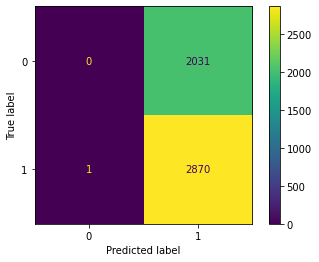

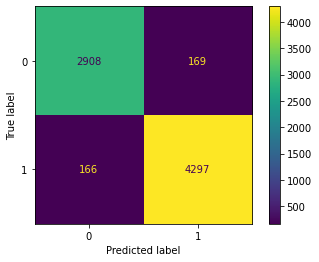

In [101]:
# Evaluate predicted testing output
# Since softmax output is used, these outputs are probability 
# vectors of value between 0 and 1 and values of each output 
# vector added to 1
y_softmax = net.predict(X_test)
y_softmax_sg = net_sg.predict(X_test_sg)

# y_pc gives the indices (strating from 0) of the max elements
y_pc = np.argmax(y_softmax, axis=-1)
y_pc_sg = np.argmax(y_softmax_sg, axis=-1)

# convert y_pc into one-hot encoding
y_pred = tf.keras.utils.to_categorical(y_pc)
y_pred_sg = tf.keras.utils.to_categorical(y_pc_sg)

sm.ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=-1), y_pred.argmax(axis=-1))
sm.ConfusionMatrixDisplay.from_predictions(y_test_sg.argmax(axis=-1), y_pred_sg.argmax(axis=-1))
plt.plot()

# Display accuracy of model predictions
print("Previous Game AVGs Data:")
print("accuracy:",sm.accuracy_score(y_test, y_pred)) 
print("R2 score:",sm.r2_score(y_test,y_pred))
print("Same Game Data:")
print("accuracy:",sm.accuracy_score(y_test_sg, y_pred_sg)) 
print("R2 score:",sm.r2_score(y_test_sg,y_pred_sg))

In [102]:
# Create and fit the model
model = LogisticRegression(fit_intercept=True, class_weight='balanced',max_iter=len(X_train)).fit(X_train, y_train_num)
model_sg = LogisticRegression(fit_intercept=True, class_weight='balanced', max_iter=len(X_train_sg)).fit(X_train_sg, y_train_sg_num)

# Predict outcome based on model for test set.
y_pred = model.predict(X_test)
y_pred_sg = model_sg.predict(X_test_sg)
print(y_pred)
print(y_pred_sg)

[1. 0. 1. ... 0. 1. 0.]
[0. 0. 1. ... 0. 1. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Previous Game AVGs Data
accuracy: 0.5173398612811098
R2 score: -0.989046477611649


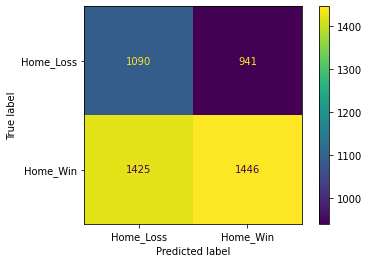

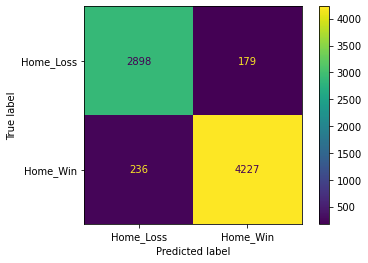

Same Game Data
accuracy: 0.9449602122015915
R2 score: 0.7721415915980097


In [105]:
# Plot the confusion matrix
Labels = ['Home_Loss', 'Home_Win']
sm.plot_confusion_matrix(model, X_test, y_test_num,display_labels=Labels,values_format = '.5g')

# Display accuracy of model predictions
print(f'Previous Game AVGs Data')
print("accuracy:",sm.accuracy_score(y_test_num, y_pred)) 
print("R2 score:",sm.r2_score(y_test_num,y_pred))

sm.plot_confusion_matrix(model_sg, X_test_sg, y_test_sg_num,display_labels=Labels,values_format = '.5g')
plt.show()

# Display accuracy of model_2 predictions
print('Same Game Data')
print("accuracy:",sm.accuracy_score(y_test_sg_num, y_pred_sg)) 
print("R2 score:",sm.r2_score(y_test_sg_num,y_pred_sg))